<a href="https://colab.research.google.com/github/Jahnavi-Majji/Face-Mask-Detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [ ]:
x  = "/kaggle/input/face-mask-dataset/data"
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/face-mask-dataset/data/with_mask'),
 PosixPath('/kaggle/input/face-mask-dataset/data/without_mask')]

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

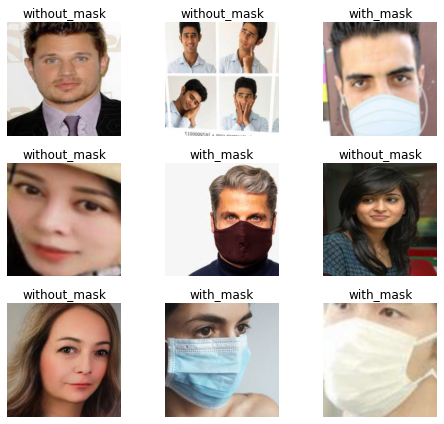

In [ ]:
data.show_batch(rows=3, figsize=(7,6))


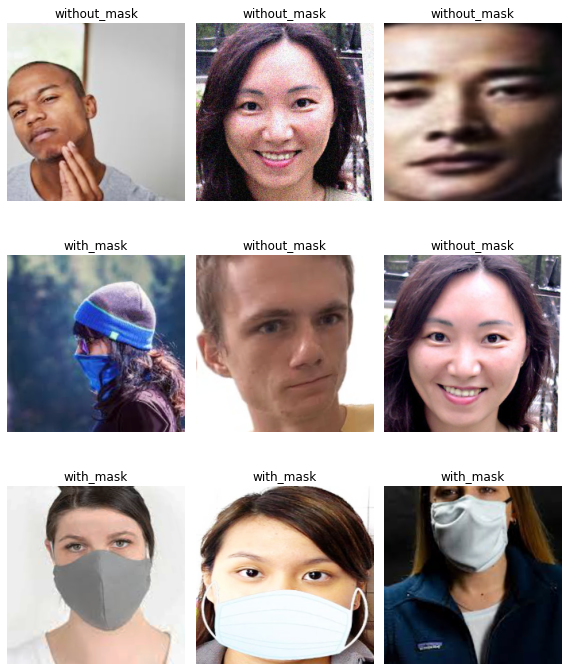

In [ ]:
data.show_batch(rows= 3, figsize=(8, 10), recompute_scale_factor=True)

In [ ]:
print(data.classes)
len(data.classes)
data.c

['with_mask', 'without_mask']


2

In [ ]:
data

ImageDataBunch;

Train: LabelList (6043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,with_mask,with_mask,with_mask,with_mask
Path: /kaggle/input/face-mask-dataset/data;

Valid: LabelList (1510 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,without_mask,without_mask,with_mask,without_mask
Path: /kaggle/input/face-mask-dataset/data;

Test: None

Perform transfer learning

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR finder

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


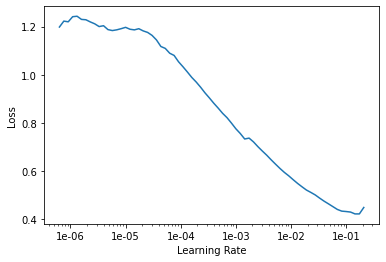

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4, slice(lr1, lr2))

In [ ]:
lr = 1e-3
model1 = learn
model1.fit_one_cycle(20, slice(lr))

as you can see above, the accuracy didn't improve after 10th epoch.
so let's change the learning rate.

In [ ]:
lr = 1e-1
learn.fit_one_cycle(20, slice(lr))

We have achieved 99.66% accuracy here. Yayy!!

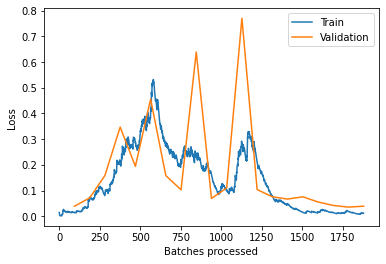

In [ ]:
learn.recorder.plot_losses()

Plot confusion matrix

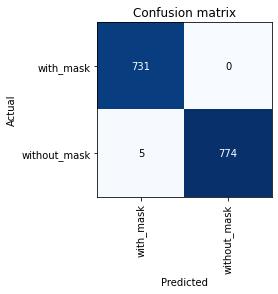

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

In [ ]:
interpret.most_confused(min_val=2)

[('without_mask', 'with_mask', 5)]

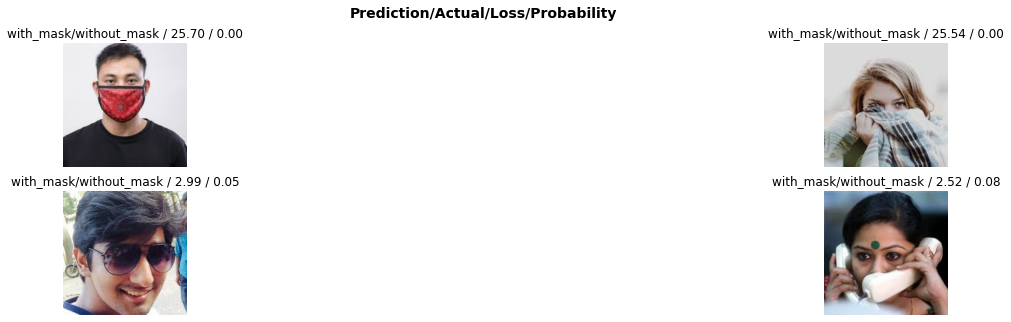

In [ ]:
interpret.plot_top_losses(4, figsize = (25,5))

save and load the model

In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')